https://github.com/jinfagang/LSTM_learn/blob/master/lstm_airline_predict.py

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation

Using TensorFlow backend.


In [2]:
# Loading dataset

df = pd.read_csv('/home/exalis/Téléchargements/Simple_Dataset_2020_01_27.csv')

In [3]:
df.head()

,Unnamed: 0,availiable_docks,date
0,0,33,2020-01-15 10:17:00
1,1,53,2020-01-15 10:17:00
2,2,19,2020-01-15 10:17:00
3,3,19,2020-01-15 10:17:00
4,4,27,2020-01-15 10:17:00


In [75]:
# Removing Month column : months are in the right order
df = df.pop("Passengers")

In [76]:
df.head()

0    112
1    118
2    132
3    129
4    121
Name: Passengers, dtype: int64

In [87]:
df.shape

(144,)

In [77]:
sequence_length=10
split=0.8

In [78]:
# Creating an array out of the dataset

df_array = np.array(df).astype(float)
print(df_array)

[112. 118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126.
 141. 135. 125. 149. 170. 170. 158. 133. 114. 140. 145. 150. 178. 163.
 172. 178. 199. 199. 184. 162. 146. 166. 171. 180. 193. 181. 183. 218.
 230. 242. 209. 191. 172. 194. 196. 196. 236. 235. 229. 243. 264. 272.
 237. 211. 180. 201. 204. 188. 235. 227. 234. 264. 302. 293. 259. 229.
 203. 229. 242. 233. 267. 269. 270. 315. 364. 347. 312. 274. 237. 278.
 284. 277. 317. 313. 318. 374. 413. 405. 355. 306. 271. 306. 315. 301.
 356. 348. 355. 422. 465. 467. 404. 347. 305. 336. 340. 318. 362. 348.
 363. 435. 491. 505. 404. 359. 310. 337. 360. 342. 406. 396. 420. 472.
 548. 559. 463. 407. 362. 405. 417. 391. 419. 461. 472. 535. 622. 606.
 508. 461. 390. 432.]


In [79]:
temp = df_array.reshape(1, -1)
print(temp)

[[112. 118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126.
  141. 135. 125. 149. 170. 170. 158. 133. 114. 140. 145. 150. 178. 163.
  172. 178. 199. 199. 184. 162. 146. 166. 171. 180. 193. 181. 183. 218.
  230. 242. 209. 191. 172. 194. 196. 196. 236. 235. 229. 243. 264. 272.
  237. 211. 180. 201. 204. 188. 235. 227. 234. 264. 302. 293. 259. 229.
  203. 229. 242. 233. 267. 269. 270. 315. 364. 347. 312. 274. 237. 278.
  284. 277. 317. 313. 318. 374. 413. 405. 355. 306. 271. 306. 315. 301.
  356. 348. 355. 422. 465. 467. 404. 347. 305. 336. 340. 318. 362. 348.
  363. 435. 491. 505. 404. 359. 310. 337. 360. 342. 406. 396. 420. 472.
  548. 559. 463. 407. 362. 405. 417. 391. 419. 461. 472. 535. 622. 606.
  508. 461. 390. 432.]]


In [80]:
# Preprocessing the data : using the MixMaxScaler from scikit learn
# Are other ones possibles?

scaler = MinMaxScaler()
df_array = scaler.fit_transform(df_array.reshape(-1, 1))

In [81]:
df_array

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [82]:
# creating data

data = []
for i in range(len(df_array) - sequence_length - 1):
    data.append(df_array[i: i + sequence_length + 1])

The idea of the sequence is to create sequences of 10 from the original dataset. It includes 10 values + 1. From 144 lines, there will be 133 arrays of 11 elements

In [83]:
data

[array([[0.01544402],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208],
        [0.06177606],
        [0.02895753],
        [0.        ]]), array([[0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208],
        [0.06177606],
        [0.02895753],
        [0.        ],
        [0.02702703]]), array([[0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208],
        [0.06177606],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123552]]), array([[0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208],
        [0.06177606],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123552],
        [0.04247104]]), array([[0.03281853],
      

In [84]:
reshaped_data = np.array(data).astype('float64')

In [105]:
reshaped_data[0]

array([[0.4034749 ],
       [0.41312741],
       [0.52123552],
       [0.5965251 ],
       [0.58108108],
       [0.48455598],
       [0.38996139],
       [0.32239382],
       [0.38996139],
       [0.40733591],
       [0.38030888]])

In [86]:
reshaped_data.shape

(133, 11, 1)

In [88]:
np.random.shuffle(reshaped_data)
# 对x进行统一归一化，而y则不归一化
x = reshaped_data[:, :-1]
y = reshaped_data[:, -1]
# La dernière donnée est scpée
split_boundary = int(reshaped_data.shape[0] * split)
train_x = x[: split_boundary]
test_x = x[split_boundary:]

train_y = y[: split_boundary]
test_y = y[split_boundary:]

Here, the different array are sufflted. X is the 10 first arrays, y, the last one.
Train is created by take the 0.8 * number of arrays,  test with the others.

In [109]:
reshaped_data.shape

(133, 11, 1)

In [108]:
reshaped_data[0]

array([[0.4034749 ],
       [0.41312741],
       [0.52123552],
       [0.5965251 ],
       [0.58108108],
       [0.48455598],
       [0.38996139],
       [0.32239382],
       [0.38996139],
       [0.40733591],
       [0.38030888]])

In [106]:
x[0]

array([[0.4034749 ],
       [0.41312741],
       [0.52123552],
       [0.5965251 ],
       [0.58108108],
       [0.48455598],
       [0.38996139],
       [0.32239382],
       [0.38996139],
       [0.40733591]])

In [107]:
y[0]

array([0.38030888])

# Building the model

In [94]:
model = Sequential()
model.add(LSTM(input_dim=1, output_dim=50, return_sequences=True))
print(model.layers)

/home/exalis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/exalis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  


In [95]:
model.add(LSTM(100, return_sequences=False))
model.add(Dense(output_dim=1))
model.add(Activation('linear'))

/home/exalis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  


In [96]:
model.compile(loss='mse', optimizer='rmsprop')

# Training the model

In [97]:
model.fit(train_x, train_y, batch_size=512, nb_epoch=30, validation_split=0.1)

/home/exalis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 95 samples, validate on 11 samples
Epoch 1/30
95/95 [==============================] - 5s 54ms/step - loss: 0.1950 - val_loss: 0.0538
Epoch 2/30
95/95 [==============================] - 0s 691us/step - loss: 0.1030 - val_loss: 0.0212
Epoch 3/30
95/95 [==============================] - 0s 697us/step - loss: 0.0480 - val_loss: 0.0078
Epoch 4/30
95/95 [==============================] - 0s 611us/step - loss: 0.0180 - val_loss: 0.0106
Epoch 5/30
95/95 [==============================] - 0s 693us/step - loss: 0.0161 - val_loss: 0.0069
Epoch 6/30
95/95 [==============================] - 0s 829us/step - loss: 0.0156 - val_loss: 0.0087
Epoch 7/30
95/95 [==============================] - 0s 678us/step - loss: 0.0149 - val_loss: 0.0058
Epoch 8/30
95/95 [==============================] - 0s 772us/step - loss: 0.0146 - val_loss: 0.0078
Epoch 9/30
95/95 [==============================] - 0s 728us/step - loss: 0.0143 - val_loss: 0.0049
Epoch 10/30
95/95 [==============================] - 0s 5

In [99]:
predict = model.predict(test_x)
predict = np.reshape(predict, (predict.size, ))

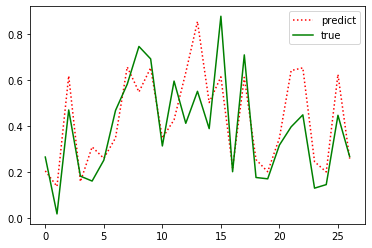

In [100]:
fig = plt.figure(1)
plt.plot(predict, 'r:')
plt.plot(test_y, 'g-')
plt.legend(['predict', 'true'])

In [13]:
def train_model(train_x, train_y, test_x, test_y):
    model = build_model()

    try:
        model.fit(train_x, train_y, batch_size=512, nb_epoch=30, validation_split=0.1)
        predict = model.predict(test_x)
        predict = np.reshape(predict, (predict.size, ))
    except KeyboardInterrupt:
        print(predict)
        print(test_y)
    print(predict)
    print(test_y)
    try:
        fig = plt.figure(1)
        plt.plot(predict, 'r:')
        plt.plot(test_y, 'g-')
        plt.legend(['predict', 'true'])
    except Exception as e:
        print(e)
    return predict, test_y

In [16]:
if __name__ == '__main__':
    train_x, train_y, test_x, test_y, scaler = load_data('/home/exalis/GitHub/velib-prediction/velib-prediction/3. Modeling Research/datasets/international-airline-passengers.csv')
    train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
    test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
    predict_y, test_y = train_model(train_x, train_y, test_x, test_y)
    predict_y = scaler.inverse_transform([[i] for i in predict_y])
    test_y = scaler.inverse_transform(test_y)
    fig2 = plt.figure(2)
    plt.plot(predict_y, 'g:')
    plt.plot(test_y, 'r-')
    plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

/home/exalis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/home/exalis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`


/home/exalis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
/home/exalis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 95 samples, validate on 11 samples
Epoch 1/30
95/95 [==============================] - 6s 64ms/step - loss: 0.1564 - val_loss: 0.0465
Epoch 2/30
95/95 [==============================] - 0s 419us/step - loss: 0.0760 - val_loss: 0.0144
Epoch 3/30
95/95 [==============================] - 0s 426us/step - loss: 0.0302 - val_loss: 0.0054
Epoch 4/30
95/95 [==============================] - 0s 415us/step - loss: 0.0138 - val_loss: 0.0049
Epoch 5/30
95/95 [==============================] - 0s 421us/step - loss: 0.0136 - val_loss: 0.0046
Epoch 6/30
95/95 [==============================] - 0s 439us/step - loss: 0.0133 - val_loss: 0.0042
Epoch 7/30
95/95 [==============================] - 0s 457us/step - loss: 0.0131 - val_loss: 0.0038
Epoch 8/30
95/95 [==============================] - 0s 482us/step - loss: 0.0129 - val_loss: 0.0035
Epoch 9/30
95/95 [==============================] - 0s 460us/step - loss: 0.0127 - val_loss: 0.0033
Epoch 10/30
95/95 [==============================] - 0s 5

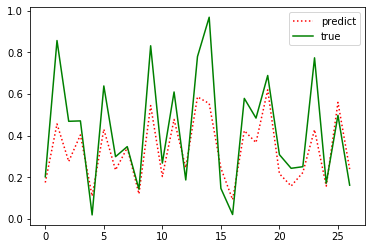

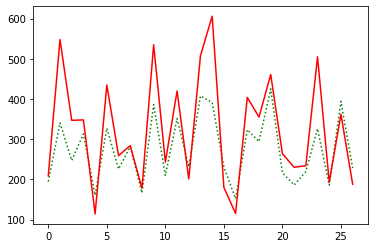

In [101]:
# ORIGINAL CODE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation


def load_data(file_name, sequence_length=10, split=0.8):
    df = pd.read_csv(file_name, sep=';', usecols=[1])
    data_all = np.array(df).astype(float)
    scaler = MinMaxScaler()
    data_all = scaler.fit_transform(data_all)
    data = []
    for i in range(len(data_all) - sequence_length - 1):
        data.append(data_all[i: i + sequence_length + 1])
    reshaped_data = np.array(data).astype('float64')
    np.random.shuffle(reshaped_data)
    # 对x进行统一归一化，而y则不归一化
    # TRAD Normaliser uniformément x tandis que y n'est pas normalisé
    x = reshaped_data[:, :-1]
    y = reshaped_data[:, -1]
    split_boundary = int(reshaped_data.shape[0] * split)
    train_x = x[: split_boundary]
    test_x = x[split_boundary:]

    train_y = y[: split_boundary]
    test_y = y[split_boundary:]

    return train_x, train_y, test_x, test_y, scaler


def build_model():
    # input_dim是输入的train_x的最后一个维度，train_x的维度为(n_samples, time_steps, input_dim)
    model = Sequential()
    model.add(LSTM(input_dim=1, output_dim=50, return_sequences=True))
    print(model.layers)
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(output_dim=1))
    model.add(Activation('linear'))

    model.compile(loss='mse', optimizer='rmsprop')
    return model


def train_model(train_x, train_y, test_x, test_y):
    model = build_model()

    try:
        model.fit(train_x, train_y, batch_size=512, nb_epoch=30, validation_split=0.1)
        predict = model.predict(test_x)
        predict = np.reshape(predict, (predict.size, ))
    except KeyboardInterrupt:
        print(predict)
        print(test_y)
    print(predict)
    print(test_y)
    try:
        fig = plt.figure(1)
        plt.plot(predict, 'r:')
        plt.plot(test_y, 'g-')
        plt.legend(['predict', 'true'])
    except Exception as e:
        print(e)
    return predict, test_y


if __name__ == '__main__':
    train_x, train_y, test_x, test_y, scaler = load_data('international-airline-passengers.csv')
    train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
    test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
    predict_y, test_y = train_model(train_x, train_y, test_x, test_y)
    predict_y = scaler.inverse_transform([[i] for i in predict_y])
    test_y = scaler.inverse_transform(test_y)
    fig2 = plt.figure(2)
    plt.plot(predict_y, 'g:')
    plt.plot(test_y, 'r-')
    plt.show()